In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

# Pandas display options
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", 99)

# pd.set_option("display.max_rows", None)
# pd.set_option("display.max_columns", None)

# Set random seed 
RSEED = 100

# Visualizations
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# pd.set_option

In [7]:
df =pd.read_csv(r"C:\Users\Saurabh\Desktop\Downloads\TaxiFare.csv")

In [15]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-04-01 00:21:13,2022-04-01 00:58:33,1.00,10.30,1.00,N,163,62,1,33.50,3.00,0.50,7.45,0.00,0.30,44.75,2.50,0.00
1,1,2022-04-01 00:07:47,2022-04-01 00:19:12,0.00,2.00,1.00,N,142,141,1,10.00,3.00,0.50,4.10,0.00,0.30,17.90,2.50,0.00
2,1,2022-04-01 00:14:52,2022-04-01 00:23:43,1.00,1.00,1.00,N,79,148,1,7.00,3.00,0.50,2.15,0.00,0.30,12.95,2.50,0.00
3,1,2022-04-01 00:30:02,2022-04-01 00:45:06,1.00,2.60,1.00,N,79,13,1,12.00,3.00,0.50,4.70,0.00,0.30,20.50,2.50,0.00
4,2,2022-04-01 00:48:40,2022-04-01 01:03:34,1.00,2.79,1.00,N,238,116,4,-12.50,-0.50,-0.50,0.00,0.00,-0.30,-13.80,0.00,0.00


In [17]:
df.shape

(3599920, 19)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             50000 non-null  object             
 1   amount                50000 non-null  float64            
 2   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   50000 non-null  float64            
 4   latitude_of_pickup    50000 non-null  float64            
 5   longitude_of_dropoff  50000 non-null  float64            
 6   latitude_of_dropoff   50000 non-null  float64            
 7   no_of_passenger       50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 3.1+ MB


In [19]:
data.drop(columns=["unique_id"], inplace=True)

In [20]:
# data["pickup_datetime"]=pd.to_datetime(data["pickup_datetime"])

### Describe the data 

In [21]:
data.describe(percentiles=[0.01, .02, .03, .04, .05, .06, .07, .9, .95,.96,.97, .98, .99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,6%,7%,50%,90%,95%,96%,97%,98%,99%,max
amount,50000.00,11.36,9.69,-5.00,3.30,3.50,3.70,4.00,4.10,4.10,4.50,8.50,20.50,30.50,33.54,38.33,46.50,52.00,200.00
longitude_of_pickup,50000.00,-72.51,10.39,-75.42,-74.01,-74.01,-74.01,-74.01,-74.01,-74.01,-74.01,-73.98,-73.95,-73.87,-73.86,-73.79,-73.14,0.00,40.78
latitude_of_pickup,50000.00,39.93,6.22,-74.01,0.00,40.58,40.65,40.68,40.70,40.71,40.71,40.75,40.78,40.79,40.79,40.79,40.80,40.81,401.08
longitude_of_dropoff,50000.00,-72.50,10.41,-84.65,-74.02,-74.01,-74.01,-74.01,-74.01,-74.01,-74.01,-73.98,-73.94,-73.87,-73.86,-73.80,-73.42,0.00,40.85
latitude_of_dropoff,50000.00,39.93,6.01,-74.01,0.00,40.56,40.65,40.67,40.69,40.69,40.70,40.75,40.78,40.79,40.80,40.80,40.81,40.83,43.42
no_of_passenger,50000.00,1.67,1.29,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4.00,5.00,5.00,5.00,5.00,6.00,6.00


### Univariate Analysis 

C:\Users\Archit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


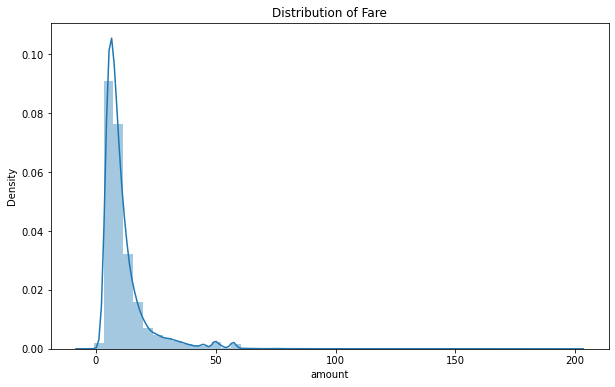

In [23]:
plt.figure(figsize = (10, 6))
sns.distplot(data['amount']);
plt.title('Distribution of Fare');
plt.show()

In [25]:
print(f"there are {len(data[data['amount']<0])} negatives")

there are 6 negatives


In [27]:
data[data["amount"]<2.5].shape

(10, 7)

In [28]:
data.shape

(50000, 7)

In [29]:
(10/ 50000)*100

0.02

In [30]:
data[data["amount"]>100].shape

(16, 7)

In [31]:
((10+16)/50000)*100

0.052

In [142]:
# data[data["fare_amount"]<0], Q1 How many rows where fare =0 ; Q2 How many rows where fare >=100

In [33]:
print("There are {} rows negative in data set".format(len(data[data["amount"]<0])))

There are 6 rows negative in data set


In [34]:
data.shape

(50000, 7)

In [35]:
8/100000

8e-05

In [67]:
# data33=data[(data["fare_amount"]>=2.5) &(data["fare_amount"]<=100) ]
# data33.shape

In [36]:
data = data[data['amount'].between(left = 2.5, right = 100)] 

In [37]:
data.shape

(49974, 7)

In [149]:
# 100171-100119

In [39]:
data['fare-bin'].value_counts() 

(0, 10]      31131
(10, 20]     13640
(20, 30]      2638
(30, 40]      1203
(40, 50]       742
(50, 60]       514
(60, 70]        47
(70, 80]        31
(80, 90]        17
(90, 100]       11
Name: fare-bin, dtype: int64

In [41]:
data['fare-bin'].value_counts()

(0, 10]      31131
(10, 20]     13640
(20, 30]      2638
(30, 40]      1203
(40, 50]       742
(50, 60]       514
(60, 70]        47
(70, 80]        31
(80, 90]        17
(90, 100]       11
Name: fare-bin, dtype: int64

### Variable : Passenger_count

In [44]:
data.columns

Index(['amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger', 'fare-bin'],
      dtype='object')

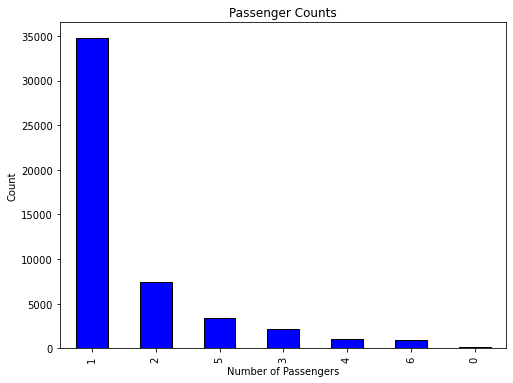

In [45]:
plt.figure(figsize=(8,6))
data['no_of_passenger'].value_counts().plot.bar(color = 'b', edgecolor = 'k');
plt.title('Passenger Counts'); 
plt.xlabel('Number of Passengers'); 
plt.ylabel('Count');

In [47]:
data["no_of_passenger"].value_counts()

1    34786
2     7385
5     3452
3     2183
4     1014
6      989
0      165
Name: no_of_passenger, dtype: int64

<AxesSubplot:ylabel='no_of_passenger'>

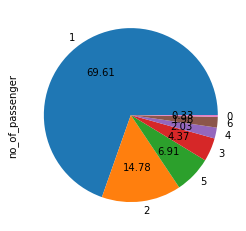

In [48]:
data["no_of_passenger"].value_counts().plot(kind="pie", autopct="%.2f")

In [39]:
# print(f'Initial Observations: {data.shape[0]}')

In [49]:
data.describe(percentiles=[0.01, .02, .025, .05, 0.1, .95, .96,.97,.975, .98, .99]).T

,count,mean,std,min,1%,2%,2.5%,5%,10%,50%,95%,96%,97%,97.5%,98%,99%,max
amount,49974.00,11.33,9.40,2.50,3.30,3.50,3.70,4.10,4.50,8.50,30.50,33.50,38.10,42.33,45.50,52.00,100.00
longitude_of_pickup,49974.00,-72.51,10.39,-75.42,-74.01,-74.01,-74.01,-74.01,-74.00,-73.98,-73.87,-73.86,-73.79,-73.78,-73.27,0.00,40.78
latitude_of_pickup,49974.00,39.93,6.22,-74.01,0.00,40.59,40.64,40.70,40.72,40.75,40.79,40.79,40.79,40.80,40.80,40.81,401.08
longitude_of_dropoff,49974.00,-72.51,10.40,-84.65,-74.02,-74.01,-74.01,-74.01,-74.00,-73.98,-73.87,-73.86,-73.80,-73.78,-73.56,0.00,40.85
latitude_of_dropoff,49974.00,39.93,6.01,-74.01,0.00,40.57,40.64,40.69,40.71,40.75,40.79,40.80,40.80,40.81,40.81,40.83,43.42
no_of_passenger,49974.00,1.67,1.29,0.00,1.00,1.00,1.00,1.00,1.00,1.00,5.00,5.00,5.00,5.00,5.00,6.00,6.00


In [51]:
data.columns

Index(['amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger', 'fare-bin'],
      dtype='object')

It does seem that the rides with a larger absolute difference in both longitude and latitude tend to cost more. To capture both differences in a single variable, we can add up the two differences in latitude and longitude and also find the square root of the sum of differences squared. The former feature would be called the Manhattan distance - or l1 norm - and the latter is called the Euclidean distance - or l2 norm. Both of these distances are specific examples of the general Minkowski distance.

###### Manhattan and Euclidean Distance
The Minkowski Distance between two points is expressed as:

D(X,Y)=(∑i=1n|xi−yi|p)1/p

if p = 1, then this is the Manhattan distance and if p = 2 this is the Euclidean distance. You may also see these referred to as the l1 or l2 norm where the number indicates p in the equation.

I should point out that these equations are only valid for actual distances in a cartesian coordinate system and here we only use them to find relative distances. To find the actual distances in terms of kilometers, we have to work with the latitude and longitude geographical coordinate system. This will be done later using the Haversine formula.

In [53]:
def minkowski_distance(x1, x2, y1, y2, p):
    return ((abs(x2 - x1) ** p) + (abs(y2 - y1)) ** p) ** (1 / p)

In [54]:
# (23,25); (45,35)
minkowski_distance(23,45, 25, 35, 2)

24.166091947189145

In [55]:
minkowski_distance(0, 3, 0, 4, 2) # Euclidean Distance

5.0

In [ ]:
Index(['amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger', 'fare-bin'],
      dtype='object')

In [58]:
data.groupby('fare-bin')['euclidean'].agg(['mean', 'count'])

,mean,count
fare-bin,,
"(0, 5]",0.28,7694
"(5, 10]",0.10,23437
"(10, 15]",0.22,9959
"(15, 20]",0.27,3681
"(20, 25]",0.30,1643
...,...,...
"(75, 80]",0.19,17
"(80, 85]",0.17,9
"(85, 90]",0.22,8


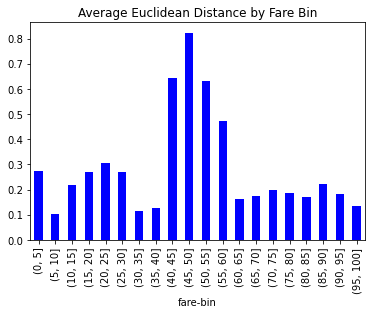

In [59]:
data.groupby('fare-bin')['euclidean'].mean().plot.bar(color = 'b');
plt.title('Average Euclidean Distance by Fare Bin');

There is a very clearly relationship between the fare bin and the average distance of the trip! This should give us confidence that this feature will be useful to a model.

Another plot we can make is the passenger count distribution colored by the fare bin.

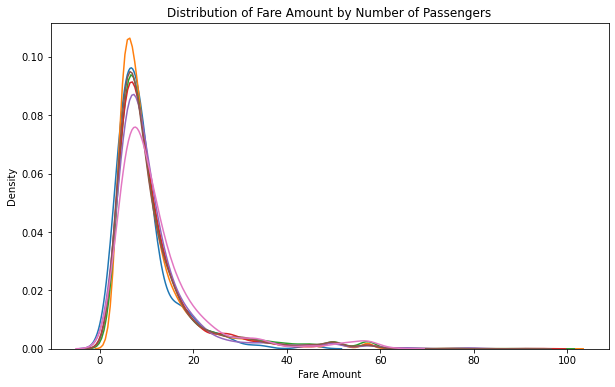

In [63]:
plt.figure(figsize = (10, 6))
for p, grouped in data.groupby('no_of_passenger'):
    sns.kdeplot(grouped['amount'], label = f'{p} passengers');
    
plt.xlabel('Fare Amount'); plt.ylabel('Density')
plt.title('Distribution of Fare Amount by Number of Passengers');

###### There does not appear to be much difference between the number of passengers. To get a more accurate picture, we can calculate the actual stats.

In [60]:
data.columns

Index(['amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger', 'fare-bin', 'abs_lat_diff', 'abs_lon_diff',
       'manhattan', 'euclidean'],
      dtype='object')

In [62]:
data.groupby('no_of_passenger')['amount'].agg(['mean', 'count'])

,mean,count
no_of_passenger,,
0,9.41,165
1,11.16,34786
2,12.00,7385
3,11.22,2183
4,11.34,1014
5,11.31,3452
6,12.54,989


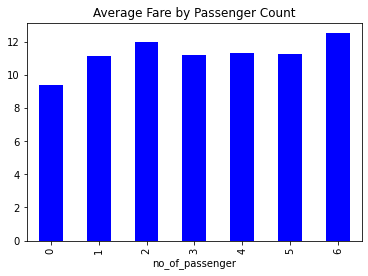

In [64]:
data.groupby('no_of_passenger')['amount'].mean().plot.bar(color = 'b');
plt.title('Average Fare by Passenger Count');

There is a small but noticeable difference in the average fare by the number of passengers.

In [101]:
data.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'fare-bin',
       'abs_lat_diff', 'abs_lon_diff', 'manhattan', 'euclidean'],
      dtype='object')

In [65]:
y=data["amount"]
X=data[['abs_lat_diff', 'abs_lon_diff', 'manhattan', 'euclidean','no_of_passenger' ]]

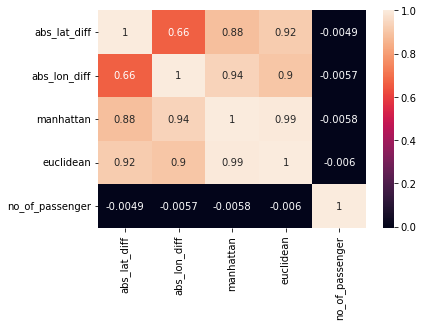

In [66]:
sns.heatmap(X.corr(), annot=True)
plt.show()

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=99)

In [68]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
# help(RandomForestRegressor)

In [72]:


# Create the random forest
random_forest = RandomForestRegressor(n_estimators = 100, max_depth = 5, 
                                      bootstrap = True,n_jobs = -1)

# Train on data
random_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_jobs=-1)

In [73]:
print("R^2 is train: ", random_forest.score(X_train, y_train))
print("R^2 is test: ", random_forest.score(X_test, y_test))

R^2 is train:  0.7960179670576187
R^2 is test:  0.7671867754143341


In [74]:
random_forest.predict(X_train)

array([ 9.84789611, 16.17644719,  8.4525016 , ...,  5.44769491,
       10.20624326,  5.44769491])

In [75]:
pred_train=random_forest.predict(X_train)
pred_test=random_forest.predict(X_test)

In [84]:
print("Train MSE", np.mean(np.square(y_train-pred_train)))
print("Test MSE", np.mean(np.square(y_test-pred_test)))

Train MSE 18.3222579988045
Test MSE 19.72179640418882


In [85]:
print("Train RMSE", np.sqrt(np.mean(np.square(y_train-pred_train))))
print("Test RMSE", np.sqrt(np.mean(np.square(y_test-pred_test))))

Train RMSE 4.280450677067136
Test RMSE 4.440922922567878


In [86]:
# Means absolute Error
print("Train MAE", np.mean(np.abs((y_train-pred_train))))
print("Test MAE", np.mean(np.abs((y_test-pred_test))))

Train MAE 2.3233440818432767
Test MAE 2.370228021723097


In [87]:
# MAPE : Mean absolute percentage Error
print("Train MAPE", np.mean(np.abs((y_train-pred_train)/y_train)))
print("Test MAPE", np.mean(np.abs((y_test-pred_test)/y_test)))

Train MAPE 0.23698288115099936
Test MAPE 0.2466221759955033


In [88]:
random_forest.feature_importances_

array([6.97328787e-03, 6.88910917e-02, 2.41561297e-02, 8.99845983e-01,
       1.33507817e-04])

In [89]:
X_train.columns

Index(['abs_lat_diff', 'abs_lon_diff', 'manhattan', 'euclidean',
       'no_of_passenger'],
      dtype='object')

In [90]:
pd.DataFrame({"Var": X_train.columns, "Imp": random_forest.feature_importances_})

,Var,Imp
0,abs_lat_diff,0.01
1,abs_lon_diff,0.07
2,manhattan,0.02
3,euclidean,0.90
4,no_of_passenger,0.00


In [91]:
from sklearn.tree import DecisionTreeRegressor

In [92]:
m1=DecisionTreeRegressor(max_depth=5)
m1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [93]:
print("R^2 is train: ", m1.score(X_train, y_train))
print("R^2 is test: ", m1.score(X_test, y_test))
print("MAE of Train: ", np.mean(np.abs((y_train-m1.predict(X_train))) ))
print("MAE of Test: ", np.mean(np.abs((y_test-m1.predict(X_test))) ))
print("RMSE of Train: ", np.sqrt(np.mean((y_train-m1.predict(X_train))**2) ))
print("RMSE of Test: ", np.sqrt(np.mean((y_test-m1.predict(X_test))**2) ))

R^2 is train:  0.7874198735228969
R^2 is test:  0.7553496769418488
MAE of Train:  2.372279077356255
MAE of Test:  2.4167595885374102
RMSE of Train:  4.369732681204844
RMSE of Test:  4.5524198600329


In [115]:
data.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'fare-bin',
       'abs_lat_diff', 'abs_lon_diff', 'manhattan', 'euclidean'],
      dtype='object')

In [94]:
data1=data.copy()

In [96]:
data1.columns

Index(['amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger', 'fare-bin', 'abs_lat_diff', 'abs_lon_diff',
       'manhattan', 'euclidean'],
      dtype='object')

In [98]:
data1["day"]=data1["date_time_of_pickup"].dt.day  # day of month 
data1["weekday"]=data1["date_time_of_pickup"].dt.weekday 
data1["month"]=data1["date_time_of_pickup"].dt.month
data1["hour"]=data1["date_time_of_pickup"].dt.hour
data1["minute"]=data1["date_time_of_pickup"].dt.minute
data1.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,fare-bin,abs_lat_diff,abs_lon_diff,manhattan,euclidean,day,weekday,month,hour,minute
0,4.50,2009-06-15 17:26:21+00:00,-73.84,40.72,-73.84,40.71,1,"(0, 5]",0.01,0.00,0.01,0.01,15,0,6,17,26
1,16.90,2010-01-05 16:52:16+00:00,-74.02,40.71,-73.98,40.78,1,"(15, 20]",0.07,0.04,0.11,0.08,5,1,1,16,52
2,5.70,2011-08-18 00:35:00+00:00,-73.98,40.76,-73.99,40.75,2,"(5, 10]",0.01,0.01,0.02,0.01,18,3,8,0,35
3,7.70,2012-04-21 04:30:42+00:00,-73.99,40.73,-73.99,40.76,1,"(5, 10]",0.02,0.00,0.03,0.03,21,5,4,4,30
4,5.30,2010-03-09 07:51:00+00:00,-73.97,40.77,-73.96,40.78,1,"(5, 10]",0.02,0.01,0.03,0.02,9,1,3,7,51


In [99]:
data1["IsMonthStart"]=np.where(data1["day"]<=10, 1,0)
data1["IsMonthEnd"]=np.where(data1["day"]>=20, 1,0)
data1["IsMonthMid"]=np.where((data1["day"]>10) & (data1["day"]<20) , 1,0)

In [100]:
data1["isWeekend"]=np.where(data1["weekday"]>4,1,0)  # 1 : weekend , 0: weekdays

In [101]:
data1["q1"]= np.where(data1["month"]<4,1,0)
data1["q2"]= np.where((data1["month"]>=4) &(data1["month"]<7) ,1,0)
data1["q3"]= np.where((data1["month"]>=7) &(data1["month"]<10) ,1,0)
data1["q4"]= np.where(data1["month"]>=10 ,1,0)

In [102]:
data1["EarlyMorning"]=np.where((data1["hour"]>4) & (data1["hour"]<8) , 1,0)
data1["Morning"]=np.where((data1["hour"]>=8) & (data1["hour"]<12) , 1,0)
data1["AftrNoom"]=np.where((data1["hour"]>=12) & (data1["hour"]<16) , 1,0)
data1["Evening"]=np.where((data1["hour"]>=16) & (data1["hour"]<20) , 1,0)
data1["Night"]=np.where((data1["hour"]>=20) & (data1["hour"]<=24) , 1,0)
data1["LateNight"]=np.where((data1["hour"]>=0) & (data1["hour"]<4) , 1,0)

In [103]:
data1.shape

(49974, 31)

In [104]:
data1[["hour" ,"month"]].describe(percentiles=[0.01, 0.03, 0.05, .1, .2,.3,.4,.5,.6,.7,.8,.9, .99]).T

,count,mean,std,min,1%,3%,5%,10%,20%,30%,40%,50%,60%,70%,80%,90%,99%,max
hour,49974.00,13.49,6.51,0.00,0.00,0.00,1.00,3.00,8.00,10.00,12.00,14.00,16.00,18.00,20.00,22.00,23.00,23.00
month,49974.00,6.27,3.46,1.00,1.00,1.00,1.00,2.00,3.00,4.00,5.00,6.00,7.00,9.00,10.00,11.00,12.00,12.00


In [105]:
data1.columns

Index(['amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger', 'fare-bin', 'abs_lat_diff', 'abs_lon_diff',
       'manhattan', 'euclidean', 'day', 'weekday', 'month', 'hour', 'minute',
       'IsMonthStart', 'IsMonthEnd', 'IsMonthMid', 'isWeekend', 'q1', 'q2',
       'q3', 'q4', 'EarlyMorning', 'Morning', 'AftrNoom', 'Evening', 'Night',
       'LateNight'],
      dtype='object')

In [106]:
x=data1[['abs_lat_diff', 'abs_lon_diff',  'euclidean', 'day',
       'weekday', 'month', 'hour', 'minute', 'IsMonthStart', 'IsMonthEnd',
       'IsMonthMid', 'isWeekend', 'q1', 'q2', 'q3', 'q4', 'EarlyMorning',
       'Morning', 'AftrNoom', 'Evening', 'Night', 'LateNight']]
y=data1['amount']

In [107]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2,random_state=88)

In [127]:
# Create the random forest
rfl = RandomForestRegressor(n_estimators = 100, max_depth = 6, 
                                      bootstrap = True,n_jobs = -1)



In [128]:
rfl.fit(x_train, y_train)

RandomForestRegressor(max_depth=6, n_jobs=-1)

In [129]:
print("Train R^2", rfl.score(x_train, y_train))
print("Test R^2", rfl.score(x_test, y_test))

Train R^2 0.8024063208063732
Test R^2 0.7849621199676912


In [130]:
print("RMSE of Train: ", np.sqrt(np.mean((y_train-rfl.predict(x_train))**2) ))
print("RMSE of Test: ", np.sqrt(np.mean((y_test-rfl.predict(x_test))**2) ))

RMSE of Train:  4.185595565914167
RMSE of Test:  4.32136702723977


In [131]:
print("MSE of Train: ", np.mean((y_train-rfl.predict(x_train))**2) )
print("MSE of Test: ", np.mean((y_test-rfl.predict(x_test))**2) )

MSE of Train:  17.519210241400355
MSE of Test:  18.674212984115083


In [126]:
pd.DataFrame({"Var": x_train.columns, "Imp":rfl.feature_importances_}).sort_values(by=["Imp"], ascending=False)

,Var,Imp
2,euclidean,0.96
1,abs_lon_diff,0.03
0,abs_lat_diff,0.01
6,hour,0.00
7,minute,0.00
...,...,...
12,q1,0.00
11,isWeekend,0.00
9,IsMonthEnd,0.00
15,q4,0.00


In [ ]:
Taxi data : create regressor 

In [ ]:
Linear Regresssion
Decision Tree Regressor
Random Forest Regressor 